# VGGNet through Transfer Learning

In [5]:
import keras
from keras.applications.vgg19 import VGG19
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras.utils import np_utils
from keras import optimizers
from matplotlib import pyplot as plt
from keras.datasets import cifar10
import numpy as np
from keras.callbacks import LearningRateScheduler
from scipy.misc import toimage

Shape of training data:  (50000, 32, 32, 3) (50000, 1)
Shape of testing data:  (10000, 32, 32, 3) (10000, 1)


c:\users\abhay\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.


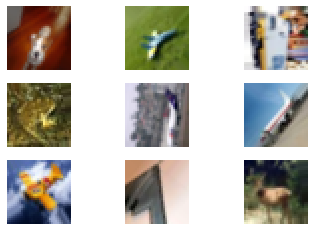

In [6]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('Shape of training data: ',x_train.shape,y_train.shape)
print('Shape of testing data: ',x_test.shape,y_test.shape)

datagen = ImageDataGenerator( rotation_range=90,
                 width_shift_range=0.1, height_shift_range=0.1,
                 horizontal_flip=True)
datagen.fit(x_train)

for X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
    # Show 9 images
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.axis('off')
        plt.xlabel(y_batch[i])
        plt.imshow(toimage(X_batch[i].reshape(32, 32, 3)))
    # show the plot
    plt.show()
    break

In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# z-score
mean = np.mean(x_train, axis=(0, 1, 2, 3))
std = np.std(x_train, axis=(0, 1, 2, 3))
x_train = (x_train - mean) / (std + 1e-7)
x_test = (x_test - mean) / (std + 1e-7)

num_classes = 10
print(y_train[0])
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
print(y_train[0])

def lr_schedule(epoch):
    lrate = 0.001
    if epoch > 75:
        lrate = 0.0005
    if epoch > 100:
        lrate = 0.0003
    return lrate

[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [8]:
batch_size = 64
epochs = 20
num_classes = 10
model = VGG19(input_shape= (32,32,3),weights="imagenet",include_top=False)

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
for layer in model.layers[:5]:
    layer.trainable = False

# last_layer = model.get_layer("block5_pool")
# last_output = last_layer.output

In [10]:
x = model.output
x = layers.Flatten()(x)
x = layers.Dense(1024,activation="relu")(x)
x = layers.Dropout(0.25)(x)
x = layers.Dense(1024,activation="relu")(x)
x = layers.Dense(num_classes,activation="softmax")(x)

network = keras.models.Model(model.input,x)
network.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
___________________________

In [11]:
network.compile(optimizer='adam',loss= 'categorical_crossentropy', metrics=['accuracy'])

In [12]:
import timeit

start = timeit.default_timer()

In [13]:
model_train = network.fit(x_train, y_train,epochs=100,batch_size=64,verbose=1,validation_split=0.2,callbacks=[LearningRateScheduler(lr_schedule)])

network.save('cifar10_vgg19_model_dropout_1.h5py')


Instructions for updating:
Use tf.cast instead.
Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 268s 7ms/step - loss: 1.8385 - acc: 0.2549 - val_loss: 1.5935 - val_acc: 0.3470
Epoch 2/100
40000/40000 [==============================] - 264s 7ms/step - loss: 1.5901 - acc: 0.3673 - val_loss: 1.6376 - val_acc: 0.3720
Epoch 3/100
40000/40000 [==============================] - 264s 7ms/step - loss: 1.5179 - acc: 0.4041 - val_loss: 1.4586 - val_acc: 0.4269
Epoch 4/100
40000/40000 [==============================] - 264s 7ms/step - loss: 1.4953 - acc: 0.4289 - val_loss: 1.4989 - val_acc: 0.4170
Epoch 5/100
40000/40000 [==============================] - 264s 7ms/step - loss: 1.5562 - acc: 0.4154 - val_loss: 1.4957 - val_acc: 0.4564
Epoch 6/100
40000/40000 [==============================] - 265s 7ms/step - loss: 1.5331 - acc: 0.4235 - val_loss: 1.8440 - val_acc: 0.2114
Epoch 7/100
40000/40000 [==============================] - 264s 7ms/

40000/40000 [==============================] - 264s 7ms/step - loss: 0.1391 - acc: 0.9638 - val_loss: 1.1257 - val_acc: 0.7776
Epoch 58/100
40000/40000 [==============================] - 264s 7ms/step - loss: 0.1043 - acc: 0.9743 - val_loss: 1.2048 - val_acc: 0.7792
Epoch 59/100
40000/40000 [==============================] - 264s 7ms/step - loss: 0.0830 - acc: 0.9793 - val_loss: 1.3300 - val_acc: 0.7672
Epoch 60/100
40000/40000 [==============================] - 264s 7ms/step - loss: 0.0932 - acc: 0.9764 - val_loss: 1.2169 - val_acc: 0.7777
Epoch 61/100
40000/40000 [==============================] - 264s 7ms/step - loss: 0.1453 - acc: 0.9639 - val_loss: 1.2236 - val_acc: 0.7774
Epoch 62/100
40000/40000 [==============================] - 264s 7ms/step - loss: 0.1106 - acc: 0.9734 - val_loss: 1.2502 - val_acc: 0.7818
Epoch 63/100
40000/40000 [==============================] - 264s 7ms/step - loss: 0.1987 - acc: 0.9536 - val_loss: 1.2152 - val_acc: 0.7705
Epoch 64/100
40000/40000 [=======

In [14]:
stop = timeit.default_timer()
final_time = stop - start;
print("Time Taken: ", final_time/3600);

Time Taken:  7.345709667333334
